#1. 데이터 셋 읽기
> iris데이터를 읽어 들이고 data와 label을 dataframe으로 만드시오

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df_data = pd.DataFrame(iris.data, columns=iris.feature_names)
df_label = pd.DataFrame(iris.target)
df_label = df_label.values.reshape(-1)
print(df_data.head(3))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2


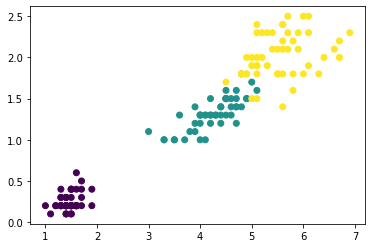

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(np.array(df_data)[:,2], np.array(df_data)[:,3], c=df_label)
plt.show()

#2. 비선형 분류

In [ ]:
import sklearn.svm as svm

svm_clf = svm.SVC(kernel='rbf')

> 학습 데이터와 검증데이터를 나누고 모델을 만든 후 정확도를 산출하시오

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.2, random_state=62)

from sklearn.metrics import accuracy_score
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9666666666666667


#3. scaling

##3.1 표준화
> 표준화를 이용하여 정확도를 산출하시오

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_matrix = scaler.fit(df_data).transform(df_data)
standard_scaler = pd.DataFrame(scaled_matrix, columns=iris.feature_names)
print(standard_scaler.mean())
print(standard_scaler.var())
standard_scaler.head(3)

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(standard_scaler, df_label, test_size=0.2, random_state=62)

svm_clf = svm.SVC(kernel='rbf')
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9333333333333333


##3.2 정규화
> 정규화를 이용하여 정확도를 산출하시오

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data_standard = scaler.fit_transform(standard_scaler)
scaled_data_ori = scaler.fit_transform(df_data)
scaled_data_ori[:3]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667]])

In [ ]:
svm_clf = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(scaled_data_standard, df_label, test_size=0.2, random_state=62)
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9333333333333333


In [ ]:
svm_clf = svm.SVC(kernel='rbf')
X_train, X_test, y_train, y_test = train_test_split(scaled_data_ori, df_label, test_size=0.2, random_state=62)
svm_clf.fit(X_train, y_train)
pred = svm_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9333333333333333


#4. 교차검증
>  scaling결과 원본 데이터가 더 안정적이므로 원본 데이터를 이용한 교차 검증을 구해보자

In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

svm_clf = svm.SVC(kernel='rbf')
scores = cross_val_score(svm_clf, df_data, df_label, cv=5, scoring='accuracy')
print(scores)
print(scores.mean())
pd.DataFrame(cross_validate(svm_clf, df_data, df_label, cv=5, scoring='accuracy'))

[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
0.9666666666666666


,fit_time,score_time,test_score
0,0.001483,0.000863,0.966667
1,0.001528,0.000811,0.966667
2,0.001475,0.000872,0.966667
3,0.001526,0.000886,0.933333
4,0.001475,0.000872,1.000000


#5. 하이퍼 파라미터

In [ ]:
from sklearn.model_selection import GridSearchCV
def get_best_param(Cost_list, Gamma_list):
  param = {
      'C' : Cost_list,
      'gamma' : Gamma_list
  }

  grid_cv = GridSearchCV(svm_clf, param_grid=param, cv=5, verbose=1)

  grid_cv.fit(X_train, y_train)
  df_scores = pd.DataFrame(grid_cv.cv_results_)

  test = '''
  ========================================================
  최고의 점수 : {}
  최적의 파라미터 : {}
  ========================================================
  '''.format(grid_cv.best_score_, grid_cv.best_params_)
  print(test)
  return df_scores[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

In [ ]:
C_list = list(range(25, 75, 1))
G_list = [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
get_best_param(C_list, G_list)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



  최고의 점수 : 0.9666666666666668
  최적의 파라미터 : {'C': 26, 'gamma': 0.1}
  


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    3.1s finished


,params,mean_test_score,std_test_score,rank_test_score
0,"{'C': 25, 'gamma': 0.001}",0.441667,0.116667,400
1,"{'C': 25, 'gamma': 0.01}",0.966667,0.031180,22
2,"{'C': 25, 'gamma': 0.1}",0.958333,0.026352,104
3,"{'C': 25, 'gamma': 1}",0.950000,0.031180,227
4,"{'C': 25, 'gamma': 10}",0.933333,0.020412,301
...,...,...,...,...
395,"{'C': 74, 'gamma': 1}",0.966667,0.031180,22
396,"{'C': 74, 'gamma': 10}",0.941667,0.033333,264
397,"{'C': 74, 'gamma': 25}",0.958333,0.037268,104
398,"{'C': 74, 'gamma': 50}",0.958333,0.045644,104


In [ ]:
C_list = list(range(1, 50, 1))
G_list = list(range(1, 2001, 1))

for i in range(len(G_list)):
  G_list[i] = G_list[i]/100

get_best_param(C_list, G_list)

Fitting 5 folds for each of 98000 candidates, totalling 490000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490000 out of 490000 | elapsed: 11.9min finished



  최고의 점수 : 0.975
  최적의 파라미터 : {'C': 1, 'gamma': 0.25}
  


,params,mean_test_score,std_test_score,rank_test_score
0,"{'C': 1, 'gamma': 0.01}",0.350000,0.020412,97998
1,"{'C': 1, 'gamma': 0.02}",0.350000,0.020412,97998
2,"{'C': 1, 'gamma': 0.03}",0.658333,0.016667,97996
3,"{'C': 1, 'gamma': 0.04}",0.700000,0.031180,97993
4,"{'C': 1, 'gamma': 0.05}",0.791667,0.083333,97991
...,...,...,...,...
97995,"{'C': 49, 'gamma': 19.96}",0.958333,0.037268,2610
97996,"{'C': 49, 'gamma': 19.97}",0.958333,0.037268,2610
97997,"{'C': 49, 'gamma': 19.98}",0.958333,0.037268,2610
97998,"{'C': 49, 'gamma': 19.99}",0.958333,0.037268,2610


#6. 최적의 모델

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
from sklearn.metrics import accuracy_score
svm_clf = svm.SVC(kernel='rbf', C=1, gamma=0.25)
X_train, X_test, y_train, y_test = train_test_split(df_data, df_label, test_size=0.2, random_state=62)
svm_clf.fit(X_train, y_train)

pred = svm_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9666666666666667
